In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

코랩 사용하시는 분들은 아래의 코드를 실행해주세요!

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# import os
# os.getcwd()

코랩 사용시 본인 구글 드라이브 경로는  
/content/drive/MyDrive/...  
입니다.

In [4]:
# path = './drive/MyDrive/...'    # 과제 데이터셋이 저장된 경로를 더 작성해주세요
# os.chdir(path)

In [5]:
# os.getcwd()

사용할 데이터 셋 :  전력 사용량 예측 모델

아래의 과정에서 sklearn의 Pipeline의 사용은 필수는 아닙니다. 선호와 필요에 따라 사용하실 분들은 사용하셔도 좋습니다.

# 데이터

건물 정보와 기후 정보를 활용한 전력사용량 예측 데이터 중에서 

환경 변수(기온, 풍속, 습도, 강수량, 일조)에 대해 전력 사용량을 선형회귀 모델을 사용해서 예측해보고자 합니다.

In [6]:
var_name = ['Temp', 'Wind', 'Moisture', 'Precipitation', 'Sun']
target = 'Wh'

In [7]:
def parsing(data: pd.DataFrame):
    x = data.iloc[:, 3:8]
    x.columns = var_name
    y = data.iloc[:, 2]
    y.name = target
    
    return x, y

In [8]:
def load_data():
    data = pd.read_csv('data/train.csv', encoding='cp949')
    data = data[: 100]
    x, y = parsing(data)    
    cut = int(round(len(x)*0.88))
    tr_x = x[:cut]
    tr_y = y[:cut]
    te_x = x[cut:]
    te_y = y[cut:]
    return tr_x, tr_y, te_x, te_y

In [9]:
train_x, train_y, test_x, test_y = load_data()

## 데이터 확인 

주의! 최종 예측하는 단계 이전에는 현재 가지고 있는 데이터, 즉 train data만을 이용하여 작업을 진행해야 합니다.

현재 가지고 있는 데이터 train_x를 보고 전력 사용량을 예측하는데에 사용할 변수를 선택해주세요.

기초세션에서 다뤘던 내용을 참고하셔서 최적의 변수 조합을 찾아보도록 합시다.

이 때 선택해야하는 변수는 하나일 수도 있고, 여러개의 변수를 사용하여도 좋습니다.

In [10]:
train_x.head()

,Temp,Wind,Moisture,Precipitation,Sun
0,17.6,2.5,92.0,0.8,0.0
1,17.7,2.9,91.0,0.3,0.0
2,17.5,3.2,91.0,0.0,0.0
3,17.1,3.2,91.0,0.0,0.0
4,17.0,3.3,92.0,0.0,0.0


In [11]:
c = train_x.columns
c

Index(['Temp', 'Wind', 'Moisture', 'Precipitation', 'Sun'], dtype='object')

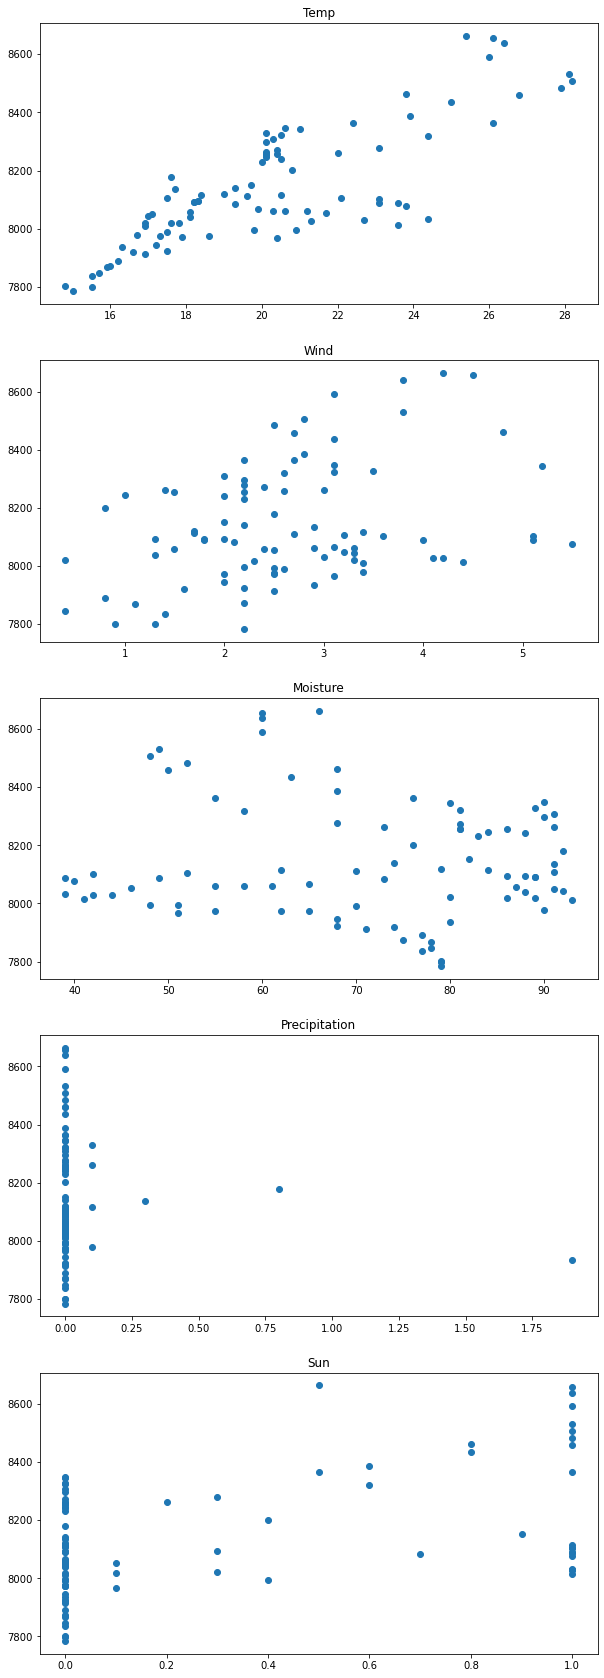

In [12]:
fig, axes = plt.subplots(len(train_x.columns), 1, figsize = (10, 30))
c = train_x.columns

for i in range(len(train_x.columns)):
    axes[i].scatter(train_x[c[i]], train_y)
    axes[i].set_title(c[i])

plt.show()

In [13]:
train_x = train_x.iloc[:, 0:3]
test_x = test_x.iloc[:, 0:3]
train_x.head()

,Temp,Wind,Moisture
0,17.6,2.5,92.0
1,17.7,2.9,91.0
2,17.5,3.2,91.0
3,17.1,3.2,91.0
4,17.0,3.3,92.0


정답은 없습니다! 

다만 최종 선택한 변수(들)이 왜 선택받았는지 간단히 알려주세요.<br>
답변 : 그래프를 그려보니 처음 세 변수만 상관성이 있다고 느껴졌다. 그래서 Temp, Wind, Moisture만 선택했다.

## 전처리

위에서 선택한 변수들(feature)를 가지고 한번 전력 사용량을 예측하는 모델을 만들어 보기에 앞서,

**train 데이터의 feature의 전처리**를 진행해보려고 합니다. StandardScaler를 사용하셔도 좋고, MinMaxScaler를 사용하셔도 좋습니다! 

또한 PolynomialFeatures를 이용하거나 직접 feature를 계산하여 고차원의 feature를 만드셔도 좋습니다. 이 또한 정답은 없습니다!

이 때 최종 train_x의 shape은 (n_samples, n_features)가 되도록 해주세요.<br>
ex. 4개의 변수를 가진 1000개의 샘플의 경우 train_x.shape은 (1000,4)가 되면 됩니다.

특히 하나의 변수만을 사용하시는 분들은 1D가 아닌 2D가 되도록 신경써주세요<br>
ex. train_x.shape이 (1000,)이 아닌 (1000,1)입니다!

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
scaler = scaler.fit(train_x)
processed_x_mm = scaler.transform(train_x)
processed_x_mm

array([[0.20895522, 0.41176471, 0.98148148],
       [0.21641791, 0.49019608, 0.96296296],
       [0.20149254, 0.54901961, 0.96296296],
       [0.17164179, 0.54901961, 0.96296296],
       [0.1641791 , 0.56862745, 0.98148148],
       [0.15671642, 0.58823529, 1.        ],
       [0.14179104, 0.58823529, 0.94444444],
       [0.15671642, 0.37254902, 0.87037037],
       [0.2238806 , 0.56862745, 0.75925926],
       [0.3358209 , 0.33333333, 0.62962963],
       [0.42537313, 0.58823529, 0.42592593],
       [0.54477612, 0.62745098, 0.24074074],
       [0.61940299, 0.70588235, 0.18518519],
       [0.61940299, 0.92156863, 0.05555556],
       [0.65671642, 0.92156863, 0.        ],
       [0.67164179, 1.        , 0.01851852],
       [0.71641791, 0.50980392, 0.        ],
       [0.65671642, 0.78431373, 0.03703704],
       [0.58955224, 0.7254902 , 0.05555556],
       [0.48507463, 0.74509804, 0.09259259],
       [0.37313433, 0.41176471, 0.22222222],
       [0.28358209, 0.41176471, 0.2962963 ],
       [0.

In [16]:
processed_x_mm.shape

(88, 3)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
preprocessd_x_s = scaler.fit_transform(train_x)
preprocessd_x_s

array([[-8.09422591e-01, -1.21390236e-01,  1.32132616e+00],
       [-7.78799552e-01,  2.50169444e-01,  1.25833770e+00],
       [-8.40045630e-01,  5.28839204e-01,  1.25833770e+00],
       [-9.62537785e-01,  5.28839204e-01,  1.25833770e+00],
       [-9.93160823e-01,  6.21729124e-01,  1.32132616e+00],
       [-1.02378386e+00,  7.14619044e-01,  1.38431463e+00],
       [-1.08502994e+00,  7.14619044e-01,  1.19534924e+00],
       [-1.02378386e+00, -3.07170076e-01,  9.43395387e-01],
       [-7.48176514e-01,  6.21729124e-01,  5.65464610e-01],
       [-2.88830933e-01, -4.92949916e-01,  1.24545370e-01],
       [ 7.86455312e-02,  7.14619044e-01, -5.68327722e-01],
       [ 5.68614150e-01,  9.00398884e-01, -1.19821235e+00],
       [ 8.74844537e-01,  1.27195856e+00, -1.38717774e+00],
       [ 8.74844537e-01,  2.29374768e+00, -1.82809698e+00],
       [ 1.02795973e+00,  2.29374768e+00, -2.01706237e+00],
       [ 1.08920581e+00,  2.66530736e+00, -1.95407390e+00],
       [ 1.27294404e+00,  3.43059364e-01

In [19]:
preprocessd_x_s.shape

(88, 3)

In [20]:
train_x = preprocessd_x_s

In [45]:
scaler = MinMaxScaler()
scaler = scaler.fit(train_x)

In [46]:
train_x = processed_x_mm

# 모델링

## 학습 

이제 모델링을 해봅시다.

앞서 다룬 여러 regression 모델들(Linear regression, Ridge Regression, Lasso Regression, ..)을 이용해서 fit을 진행해보도록 합시다.

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linear_model = LinearRegression().fit(train_x, train_y)
linear_pred_y = linear_model.predict(train_x)

linear_beta = linear_model.coef_
linear_beta = [f"{x: .4f}" for x in linear_beta]
linear_intercept = linear_model.intercept_
print(f"Beta :{linear_beta}")
print(f"Intercept : {linear_intercept: .4f}")

Beta :[' 244.3392', ' 13.2592', ' 140.7058']
Intercept :  8142.1863


In [23]:
from sklearn.linear_model import Ridge

In [24]:
ridge_model = Ridge(random_state=123).fit(train_x, train_y)
ridge_pred_y = ridge_model.predict(train_x)

ridge_beta = ridge_model.coef_
ridge_intercept = ridge_model.intercept_
print(f"Beta :{ridge_beta}")
print(f"Intercept : {ridge_intercept: .4f}")

Beta :[238.0762704   13.80501398 135.4902861 ]
Intercept :  8142.1863


In [25]:
from sklearn.linear_model import Lasso

In [26]:
lasso_model = Lasso().fit(train_x, train_y)
lasso_pred_y = lasso_model.predict(train_x)

lasso_beta = lasso_model.coef_
lasso_intercept = lasso_model.intercept_
print(f"Beta :{lasso_beta}")
print(f"Intercept : {lasso_intercept: .4f}")

Beta :[242.10602885  11.95375273 137.67679565]
Intercept :  8142.1863


In [27]:
# 선형회귀 모델 생성 후 fitting 시킵니다.
model = Ridge().fit(train_x, train_y)

## 추정

이제 train_x를 이용하여 전력사용량을 추정해보도록 합시다.

In [47]:
beta = model.coef_
intercept = model.intercept_
print(f"Beta :{beta}")
print(f"Intercept : {intercept: .4f}")

Beta :[238.0762704   13.80501398 135.4902861 ]
Intercept :  8142.1863


In [48]:
train_x

array([[0.20895522, 0.41176471, 0.98148148],
       [0.21641791, 0.49019608, 0.96296296],
       [0.20149254, 0.54901961, 0.96296296],
       [0.17164179, 0.54901961, 0.96296296],
       [0.1641791 , 0.56862745, 0.98148148],
       [0.15671642, 0.58823529, 1.        ],
       [0.14179104, 0.58823529, 0.94444444],
       [0.15671642, 0.37254902, 0.87037037],
       [0.2238806 , 0.56862745, 0.75925926],
       [0.3358209 , 0.33333333, 0.62962963],
       [0.42537313, 0.58823529, 0.42592593],
       [0.54477612, 0.62745098, 0.24074074],
       [0.61940299, 0.70588235, 0.18518519],
       [0.61940299, 0.92156863, 0.05555556],
       [0.65671642, 0.92156863, 0.        ],
       [0.67164179, 1.        , 0.01851852],
       [0.71641791, 0.50980392, 0.        ],
       [0.65671642, 0.78431373, 0.03703704],
       [0.58955224, 0.7254902 , 0.05555556],
       [0.48507463, 0.74509804, 0.09259259],
       [0.37313433, 0.41176471, 0.22222222],
       [0.28358209, 0.41176471, 0.2962963 ],
       [0.

In [49]:
esti_y =  sum([beta[i]*train_x[:,i] for i in range(3)]) + intercept

In [50]:
esti_y2 = model.predict(train_x)

In [51]:
np.all(esti_y == esti_y2)

True

# Loss 및 시각화

앞서 fitting하여 얻은 모델을 이용하여 추정한 값으로 MSE를 측정해봅시다. 변수를 하나만 사용하신 분들은 xy 평면에 한번 같이 시각화도 해보셔도 좋습니다.

In [52]:
def mse(pred, true):
    return np.mean((pred-true)**2)

In [53]:
train_mse = mse(esti_y, train_y)
print(f"Linear {train_mse:.5f}")

Linear 58889.34573


In [34]:
def visualize(model, x, y):
    if x.shape[1] != 1:
        return None
    beta = model.coef_[0]
    intercept = model.intercept_
    
    x_axis = np.linspace(np.min(x), np.max(x), 100)
    fit = intercept * x_axis**0 + beta*x_axis 

    plt.figure(figsize=(8,6))
    plt.plot(x_axis, fit, label='Predict', c='r', linewidth=3)
    plt.scatter(x, y, c='blue')
    plt.legend()
    plt.show()

In [35]:
# visualization 하실 분은 진행해주세요!
# visualize(model, train_x, train_y)

# 예측

테스트셋에 대해서 한번 **예측**해보도록 합시다.

이미 fitting된 모델 (그리고 scaler를 사용하신다면 scaler)에 대해 **fit을 하지 말고** 단순히 predict만 진행해보도록 합시다. 

scaler는 transform만 하시고 model은 predict을 진행해주세요

In [54]:
# transform을 하시는 분들은 실행해주세요

test_x = scaler.transform(test_x)

In [55]:
# y1_hat에 predict값 할당
pred_y = model.predict(test_x)

# 성능 평가

한번 학습한 모델에 대해 test_y를 이용하여 mse loss를 측정해도도록 합시다.

In [56]:
def score(train_mse, test_mse):
    print(f"{test_mse/train_mse: .4f}")

In [57]:
test_mse = mse(pred_y, test_y)
print(f"Linear {test_mse:.5f}")

Linear 63847.99769


In [58]:
score(train_mse,test_mse)

 1.0842


In [41]:
# visualization 하실 분은 진행해주세요!
# visualize(model, test_x, test_y)

# 그 이후

이제 여러분들은 한번 모델을 만들어보고 fitting한 다음 예측까지 해보셨습니다.

이제 개선하기 위해 1.데이터부터 5.성능평가 중 수정, 변경하실 부분을 업데이트 해서  최적의 모델을 찾아보세요!

현재 사용하고 있는 scaler, model부터 전처리과정 기타 여러 조건을 조작해보시고 어떤 효과가 있는지 한번 보시고 알려주세요:D

고생하셨습니다!